## 1) Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

plt.rcParams["figure.figsize"] = (10, 5)
sns.set_theme(style="whitegrid")


## 2) Load Dataset

In [3]:
data = pd.read_csv("AQI_INDIA_AI.csv")
print("Shape:", data.shape)
data.head()


Shape: (3250, 11)


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",16-12-2025 10:00:00,16.554731,80.649110,PM10,44.0,55.0,48.0
1,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",16-12-2025 10:00:00,17.720000,83.300000,NH3,3.0,4.0,4.0
2,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",16-12-2025 10:00:00,27.103358,93.679645,PM10,44.0,402.0,141.0
3,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",16-12-2025 10:00:00,27.103358,93.679645,NO2,6.0,7.0,7.0
4,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",16-12-2025 10:00:00,27.103358,93.679645,SO2,9.0,10.0,9.0


## 3) Quick Overview

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3250 non-null   object 
 1   state          3250 non-null   object 
 2   city           3250 non-null   object 
 3   station        3250 non-null   object 
 4   last_update    3250 non-null   object 
 5   latitude       3250 non-null   float64
 6   longitude      3250 non-null   float64
 7   pollutant_id   3250 non-null   object 
 8   pollutant_min  3070 non-null   float64
 9   pollutant_max  3070 non-null   float64
 10  pollutant_avg  3070 non-null   float64
dtypes: float64(5), object(6)
memory usage: 279.4+ KB


In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,3250,1,India,3250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,3250,31,Maharashtra,538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,3250,259,Delhi,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
station,3250,489,"Khatikan Mohalla, Dausa - RSPCB",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_update,3250,1,16-12-2025 10:00:00,3250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,3250.0,NaN,NaN,NaN,22.991985,5.39587,8.5637,19.167462,23.761662,27.554793,34.066206
longitude,3250.0,NaN,NaN,NaN,78.747281,4.882163,70.909168,75.730943,77.332067,80.882537,94.636574
pollutant_id,3250,7,PM10,479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pollutant_min,3070.0,NaN,NaN,NaN,36.981433,54.108769,1.0,6.0,17.0,47.0,391.0
pollutant_max,3070.0,NaN,NaN,NaN,104.676547,114.709209,1.0,20.0,68.0,137.0,500.0


## 4) Missing Values & Bar graph


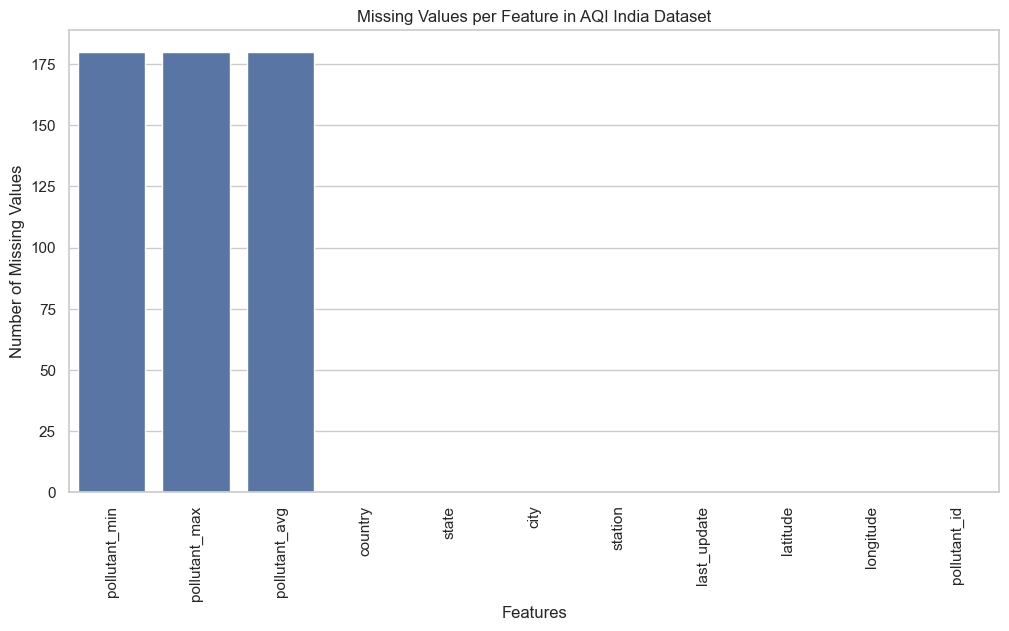

pollutant_min    180
pollutant_max    180
pollutant_avg    180
country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
dtype: int64

In [8]:
missing_values = data.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=missing_values.index,
    y=missing_values.values
)

plt.title("Missing Values per Feature in AQI India Dataset")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)
plt.show()

# Display missing value counts
missing_values


## 5) Remove Duplicates

In [9]:
dups = data.duplicated().sum()
print("Duplicate rows:", dups)
data = data.drop_duplicates()
print("Shape after dropping duplicates:", data.shape)


Duplicate rows: 0
Shape after dropping duplicates: (3250, 11)


## 6) Feature Engineering – Date/Time (last_update)

In [11]:
if "last_update" in data.columns:
    data["last_update"] = pd.to_datetime(data["last_update"], errors="coerce", dayfirst=True)
    data["update_year"] = data["last_update"].dt.year
    data["update_month"] = data["last_update"].dt.month
    data["update_day"] = data["last_update"].dt.day
    data["update_hour"] = data["last_update"].dt.hour
    data = data.drop(columns=["last_update"])

    for c in ["update_year","update_month","update_day","update_hour"]:
        if data[c].isnull().any():
            data[c] = data[c].fillna(int(data[c].median()))
else:
    print("Column 'last_update' not found. Skipping.")

data.head()


Column 'last_update' not found. Skipping.


,country,state,city,station,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,update_year,update_month,update_day,update_hour
0,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",16.554731,80.649110,PM10,44.0,55.0,48.0,2025,12,16,10
1,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",17.720000,83.300000,NH3,3.0,4.0,4.0,2025,12,16,10
2,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",27.103358,93.679645,PM10,44.0,402.0,141.0,2025,12,16,10
3,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",27.103358,93.679645,NO2,6.0,7.0,7.0,2025,12,16,10
4,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",27.103358,93.679645,SO2,9.0,10.0,9.0,2025,12,16,10


## 7) Handle Missing Values

In [12]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
cat_cols = data.select_dtypes(include='object').columns.tolist()

for col in num_cols:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].median())

for col in cat_cols:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].mode()[0])

print("Remaining missing values:", int(data.isnull().sum().sum()))


Remaining missing values: 0


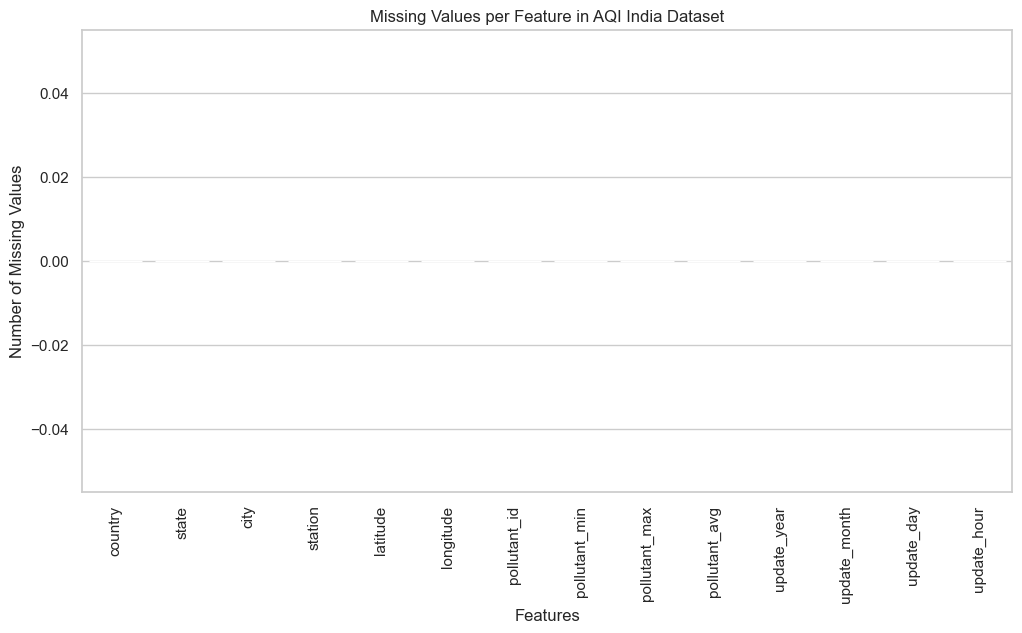

country          0
state            0
city             0
station          0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
update_year      0
update_month     0
update_day       0
update_hour      0
dtype: int64

In [47]:
missing_values = data.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=missing_values.index,
    y=missing_values.values
)

plt.title("Missing Values per Feature in AQI India Dataset")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)
plt.show()

# Display missing value counts
missing_values


## 8) Target Check

In [15]:
target = "pollutant_avg"
if target not in data.columns:
    print("ERROR: 'pollutant_avg' not found.")
    print("Available columns:", list(data.columns))
    raise KeyError("Target column pollutant_avg not found.")
else:
    print("Target column found:", target)


Target column found: pollutant_avg


## 9) Encode Categorical Features

In [16]:
label_encoders = {}
cat_cols = data.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

print("Encoded categorical columns:", cat_cols)
data.head()


Encoded categorical columns: ['country', 'state', 'city', 'station', 'pollutant_id']


,country,state,city,station,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,update_year,update_month,update_day,update_hour
0,0,1,252,350,16.554731,80.649110,4,44.0,55.0,48.0,2025,12,16,10
1,0,1,255,112,17.720000,83.300000,1,3.0,4.0,4.0,2025,12,16,10
2,0,2,174,277,27.103358,93.679645,4,44.0,402.0,141.0,2025,12,16,10
3,0,2,174,277,27.103358,93.679645,2,6.0,7.0,7.0,2025,12,16,10
4,0,2,174,277,27.103358,93.679645,6,9.0,10.0,9.0,2025,12,16,10


## 10) EDA Graphs

### 10.1 Target Distribution

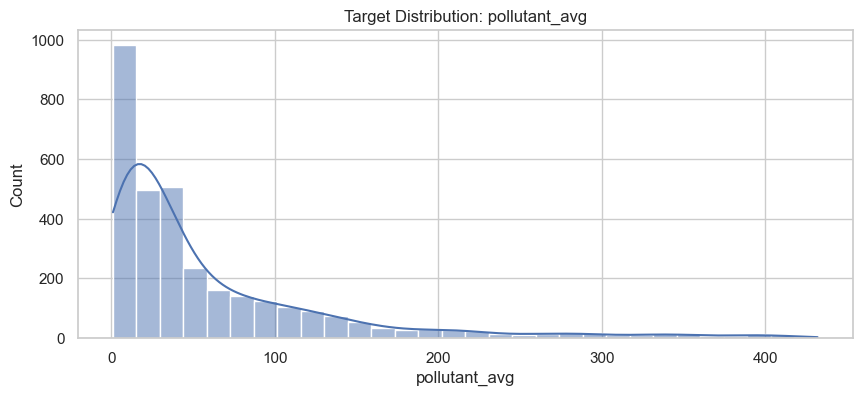

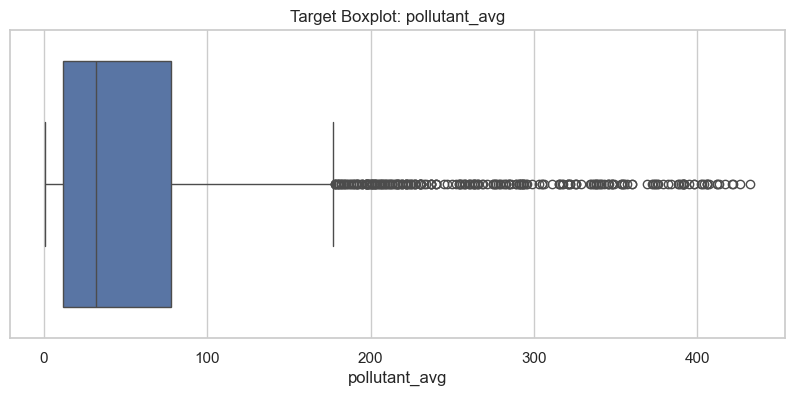

In [17]:
plt.figure(figsize=(10,4))
sns.histplot(data[target], kde=True, bins=30)
plt.title("Target Distribution: pollutant_avg")
plt.xlabel("pollutant_avg")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=data[target])
plt.title("Target Boxplot: pollutant_avg")
plt.show()


### 10.2 Numeric Feature Distributions

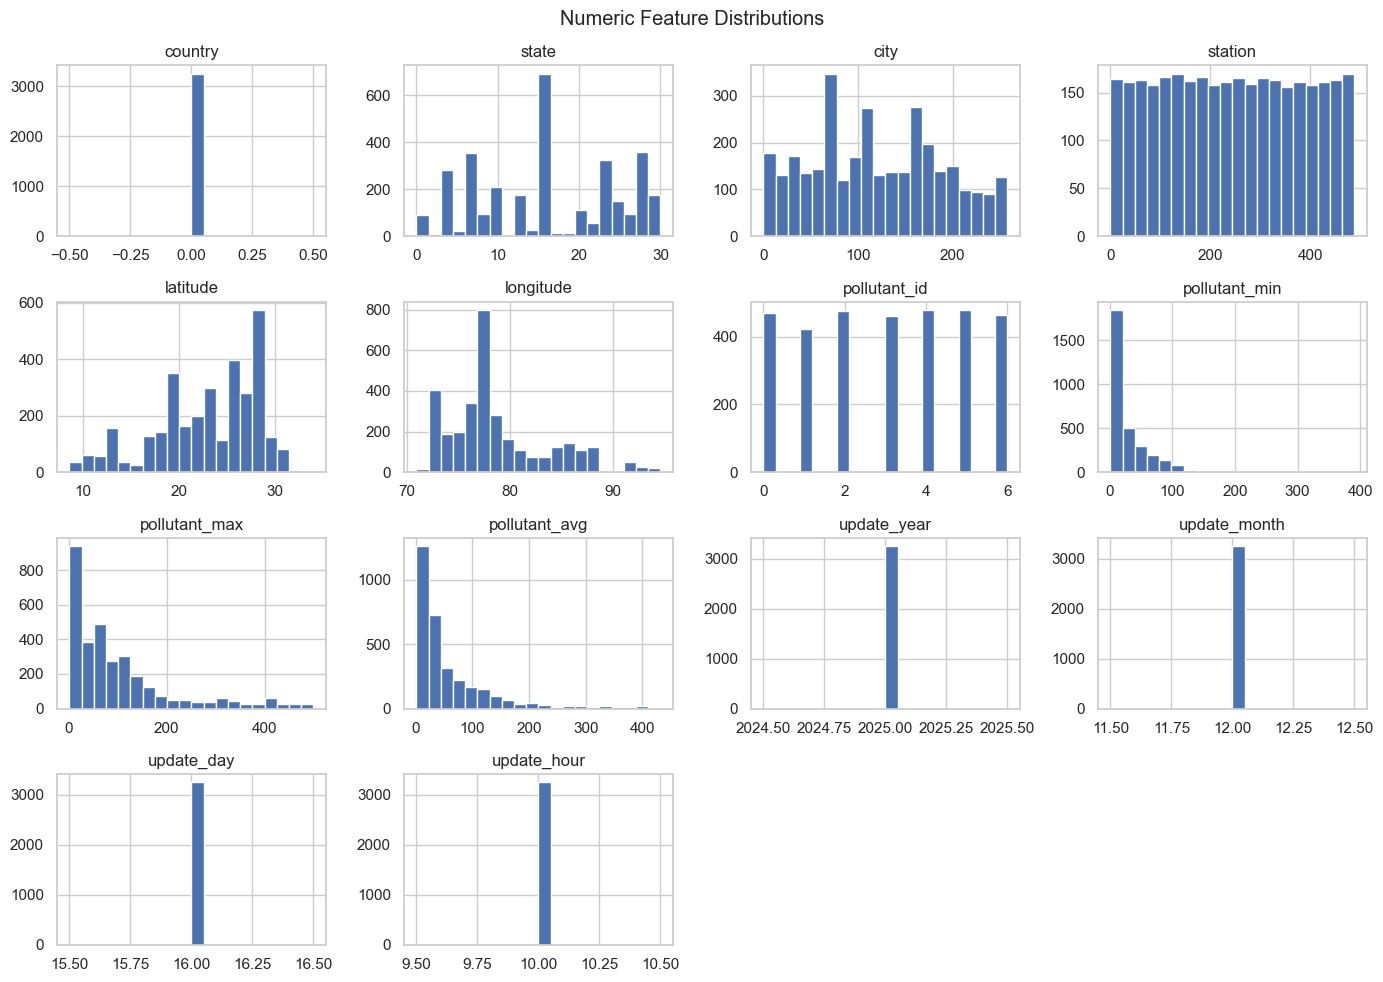

In [19]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
show_cols = num_cols[:20] if len(num_cols) > 20 else num_cols

data[show_cols].hist(bins=20, figsize=(14,10))
plt.suptitle("Numeric Feature Distributions")
plt.tight_layout()
plt.show()


### 10.3 Correlation Heatmap

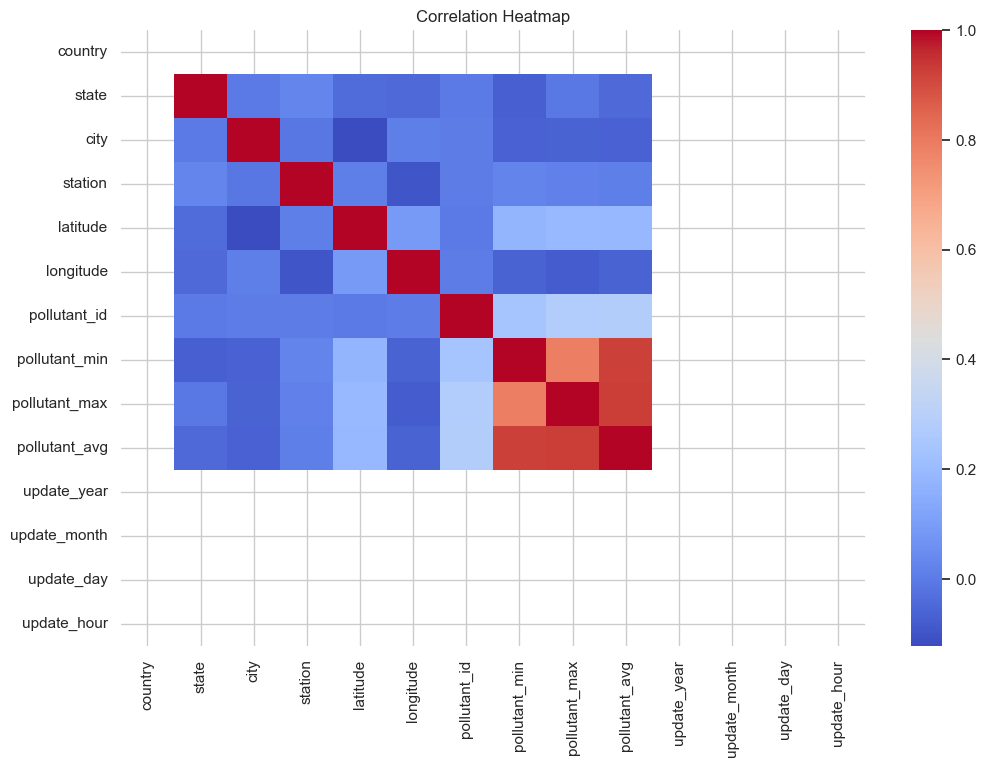

In [20]:
plt.figure(figsize=(12,8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


## 11) Train/Test Split

In [34]:
X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)


X_train: (2600, 13) X_test: (650, 13)


## 12) Scaling (Required for KNN)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 13) Train Models (Regression)

### 13.1 Decision Tree Regressor

In [48]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree -> MAE:", dt_mae)
print("Decision Tree -> MSE:", dt_mse)
print("Decision Tree -> RMSE:", dt_rmse)
print("Decision Tree -> R2:", dt_r2)


Decision Tree -> MAE: 11.28923076923077
Decision Tree -> MSE: 486.20307692307694
Decision Tree -> RMSE: 22.05001308215206
Decision Tree -> R2: 0.9127796684021842


### 13.2 Random Forest Regressor

In [37]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest -> MAE:", rf_mae)
print("Random Forest -> MSE:", rf_mse)
print("Random Forest -> RMSE:", rf_rmse)
print("Random Forest -> R2:", rf_r2)


Random Forest -> MAE: 7.861579487179487
Random Forest -> MSE: 241.9129592820513
Random Forest -> RMSE: 15.553551339872554
Random Forest -> R2: 0.9566030543041428


### 13.3 KNN Regressor

In [38]:
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)

knn_pred = knn_model.predict(X_test_scaled)

knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_pred)

print("KNN -> MAE:", knn_mae)
print("KNN -> MSE:", knn_mse)
print("KNN -> RMSE:", knn_rmse)
print("KNN -> R2:", knn_r2)


KNN -> MAE: 13.44989010989011
KNN -> MSE: 432.0030455259026
KNN -> RMSE: 20.784682954664056
KNN -> R2: 0.922502652347474


## 14) Model Comparison Table + Graphs

In [39]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "KNN"],
    "MAE": [dt_mae, rf_mae, knn_mae],
    "RMSE": [dt_rmse, rf_rmse, knn_rmse],
    "R2": [dt_r2, rf_r2, knn_r2]
})

results


,Model,MAE,RMSE,R2
0,Decision Tree,11.289231,22.050013,0.912780
1,Random Forest,7.861579,15.553551,0.956603
2,KNN,13.449890,20.784683,0.922503


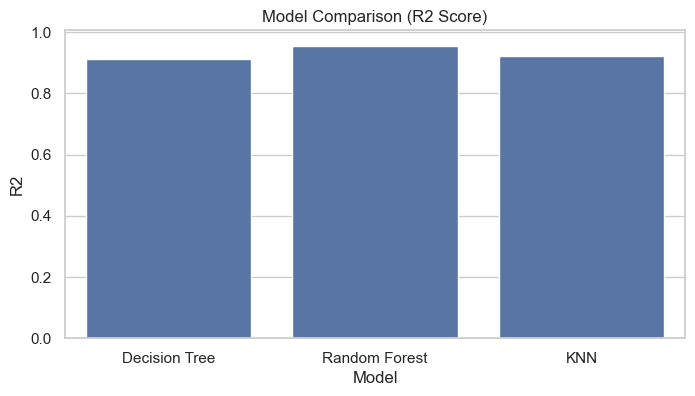

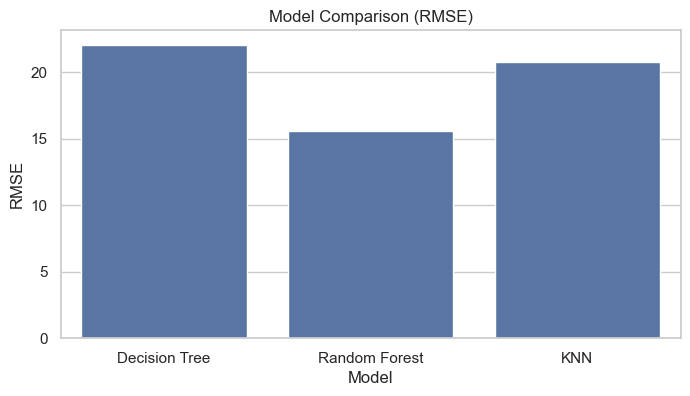

In [40]:
plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="R2", data=results)
plt.title("Model Comparison (R2 Score)")
plt.ylim(0, max(1, results["R2"].max() + 0.05))
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="RMSE", data=results)
plt.title("Model Comparison (RMSE)")
plt.show()


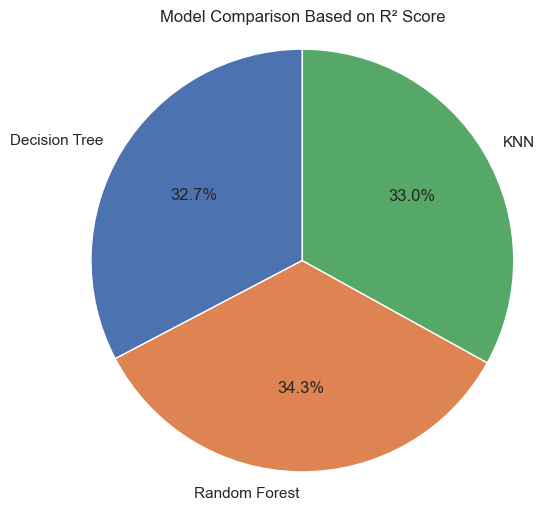

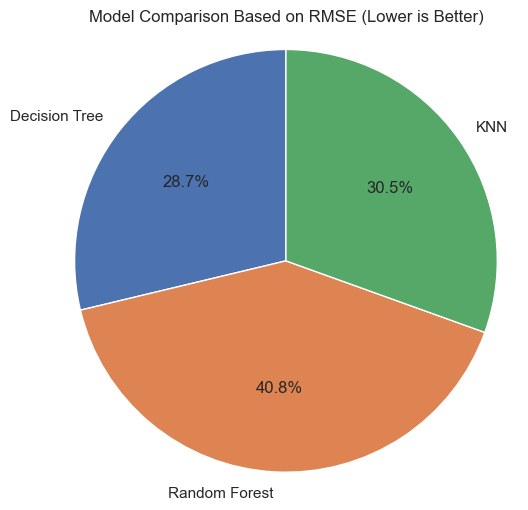

In [50]:
plt.figure(figsize=(6,6))
plt.pie(
    results["R2"],
    labels=results["Model"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Model Comparison Based on R² Score")
plt.axis("equal")
plt.show()
# Invert RMSE so better models get larger slices
rmse_inverse = 1 / results["RMSE"]

plt.figure(figsize=(6,6))
plt.pie(
    rmse_inverse,
    labels=results["Model"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Model Comparison Based on RMSE (Lower is Better)")
plt.axis("equal")
plt.show()



## 15) Regression Evaluation Graphs

### 15.1 Actual vs Predicted (All Models)

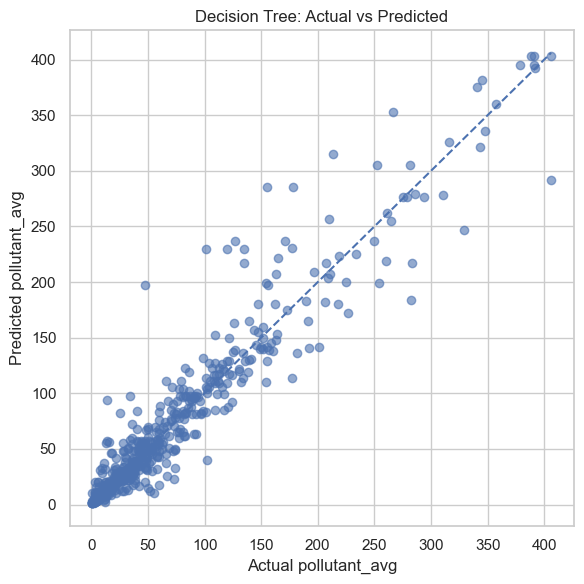

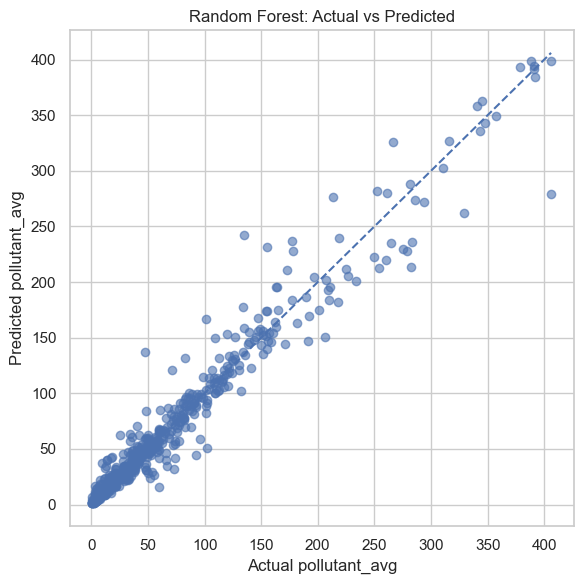

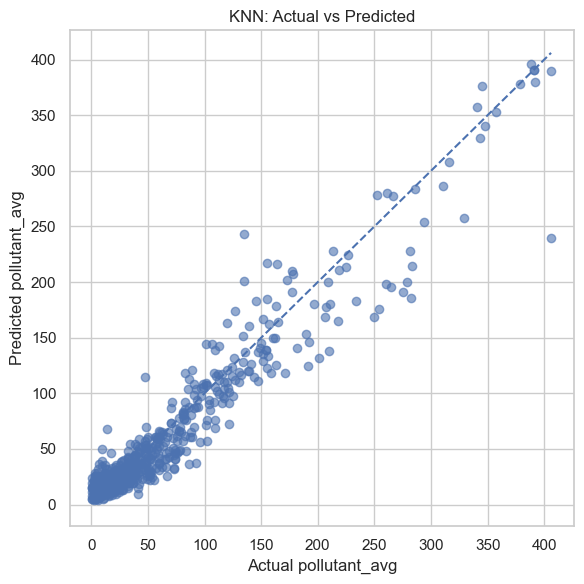

In [41]:
pred_map = {
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "KNN": knn_pred
}

for name, pred in pred_map.items():
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, pred, alpha=0.6)
    plt.xlabel("Actual pollutant_avg")
    plt.ylabel("Predicted pollutant_avg")
    plt.title(f"{name}: Actual vs Predicted")
    mn = min(y_test.min(), pred.min())
    mx = max(y_test.max(), pred.max())
    plt.plot([mn, mx], [mn, mx], linestyle="--")
    plt.tight_layout()
    plt.show()


### 15.2 Residual Distribution (All Models)

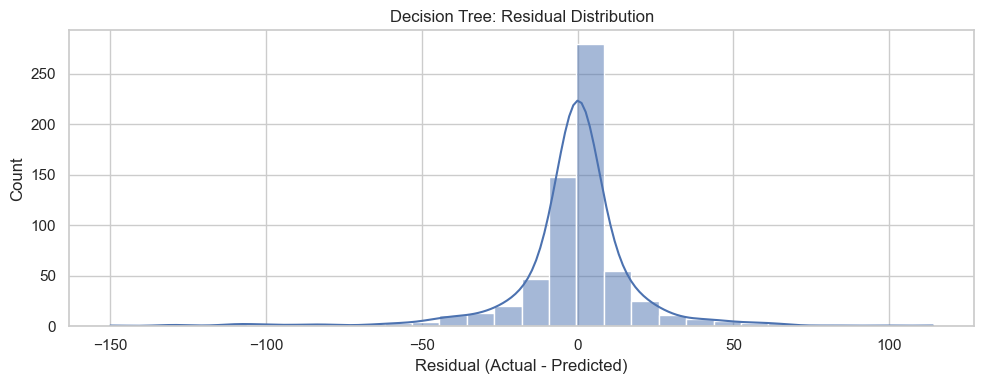

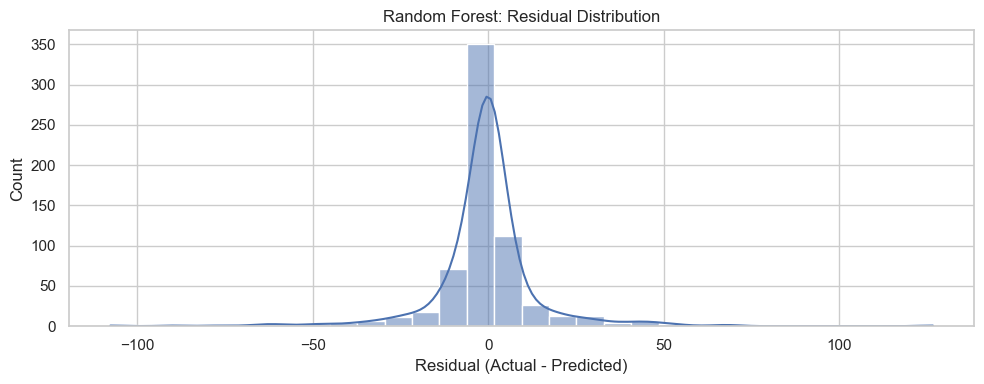

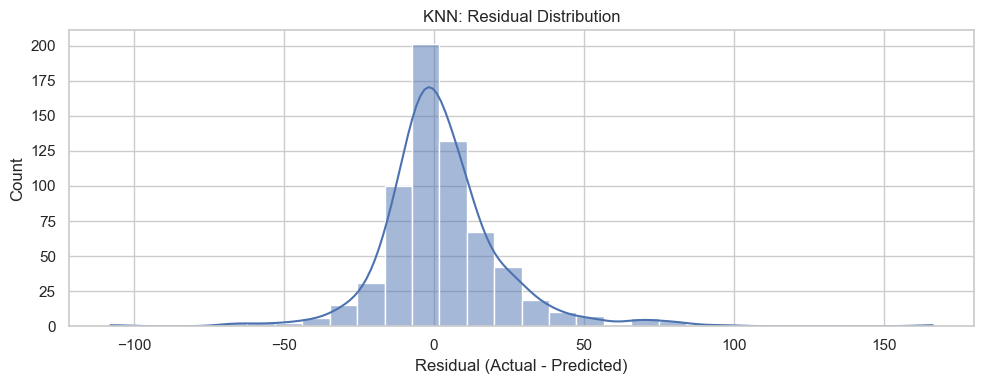

In [42]:
for name, pred in pred_map.items():
    residuals = y_test - pred
    plt.figure(figsize=(10,4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"{name}: Residual Distribution")
    plt.xlabel("Residual (Actual - Predicted)")
    plt.tight_layout()
    plt.show()


### 15.3 Residuals vs Predicted (All Models)

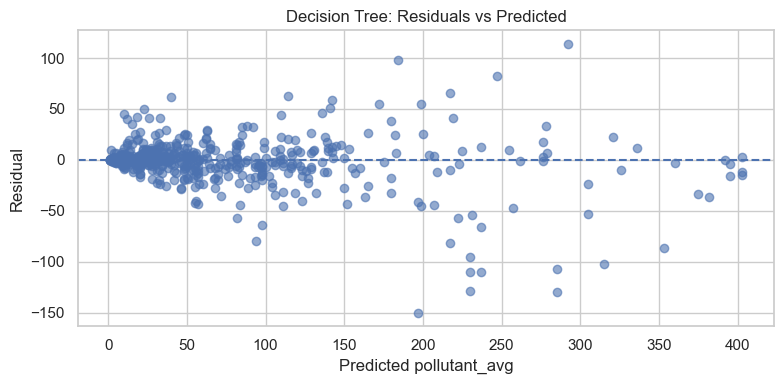

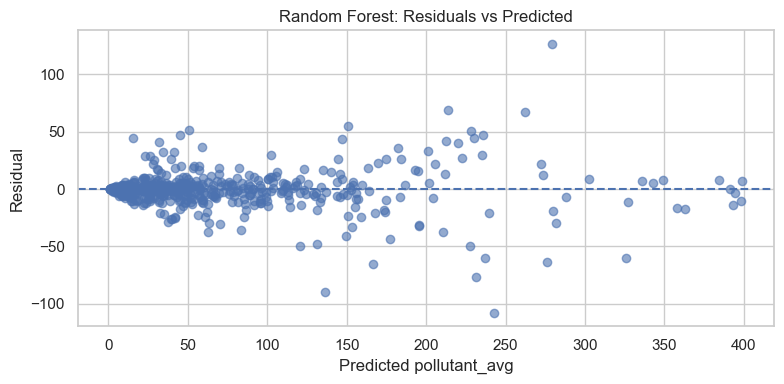

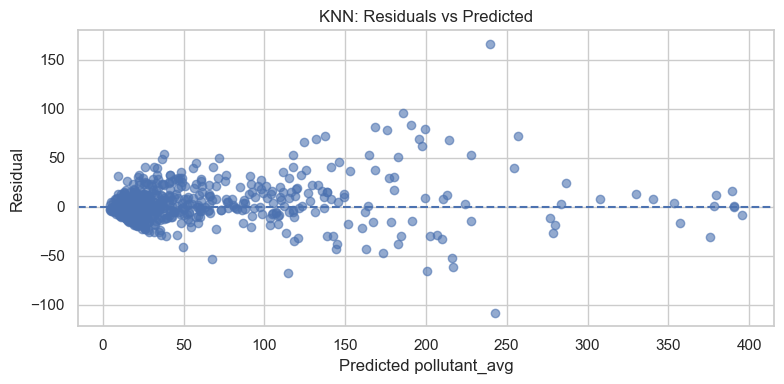

In [43]:
for name, pred in pred_map.items():
    residuals = y_test - pred
    plt.figure(figsize=(8,4))
    plt.scatter(pred, residuals, alpha=0.6)
    plt.axhline(0, linestyle="--")
    plt.title(f"{name}: Residuals vs Predicted")
    plt.xlabel("Predicted pollutant_avg")
    plt.ylabel("Residual")
    plt.tight_layout()
    plt.show()


## 16) Feature Importance (Tree-Based Models)

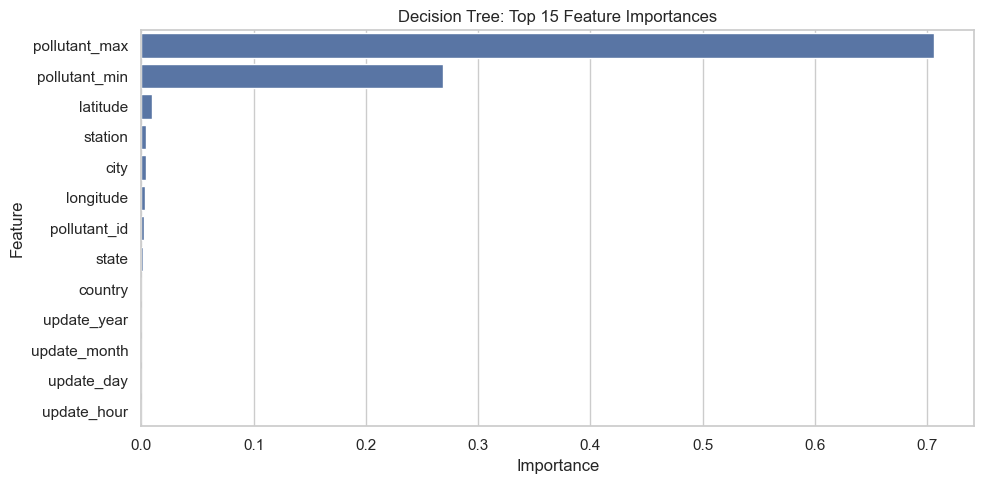

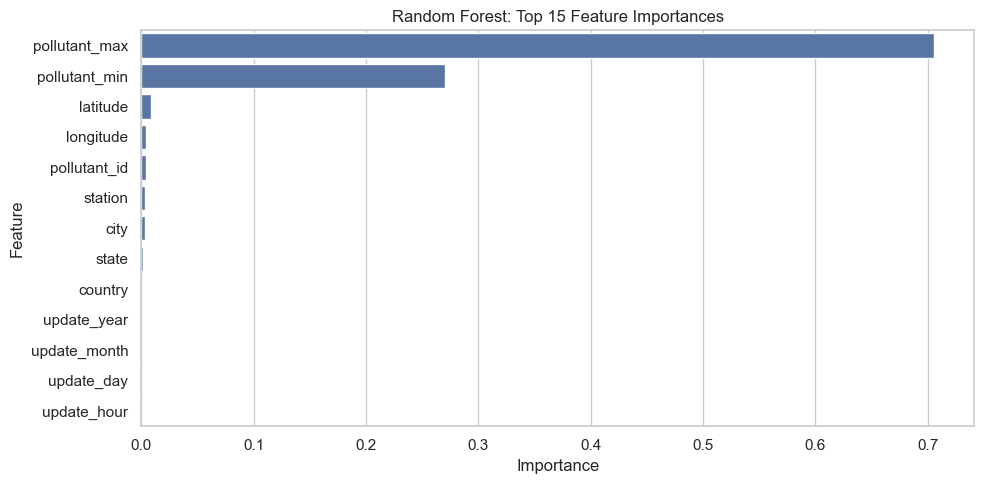

In [44]:
feature_names = X.columns.tolist()

dt_imp = pd.Series(dt_model.feature_importances_, index=feature_names).sort_values(ascending=False).head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=dt_imp.values, y=dt_imp.index)
plt.title("Decision Tree: Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

rf_imp = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False).head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=rf_imp.values, y=rf_imp.index)
plt.title("Random Forest: Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## 17) Sample Predictions (Real Rows)

In [45]:
sample_1 = X.iloc[[0]]
sample_2 = X.iloc[[10]]

print("Sample 1 features:")
display(sample_1)
print("Actual pollutant_avg:", y.iloc[0])

print("\nSample 2 features:")
display(sample_2)
print("Actual pollutant_avg:", y.iloc[10])


Sample 1 features:


,country,state,city,station,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,update_year,update_month,update_day,update_hour
0,0,1,252,350,16.554731,80.64911,4,44.0,55.0,2025,12,16,10


Actual pollutant_avg: 48.0

Sample 2 features:


,country,state,city,station,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,update_year,update_month,update_day,update_hour
10,0,3,97,214,26.10887,91.589544,5,38.0,148.0,2025,12,16,10


Actual pollutant_avg: 93.0


In [33]:
pred_dt_1 = dt_model.predict(sample_1)[0]
pred_rf_1 = rf_model.predict(sample_1)[0]
pred_knn_1 = knn_model.predict(scaler.transform(sample_1))[0]

pred_dt_2 = dt_model.predict(sample_2)[0]
pred_rf_2 = rf_model.predict(sample_2)[0]
pred_knn_2 = knn_model.predict(scaler.transform(sample_2))[0]

print("=== Predictions for Sample 1 ===")
print("Decision Tree:", pred_dt_1)
print("Random Forest:", pred_rf_1)
print("KNN:", pred_knn_1)

print("\n=== Predictions for Sample 2 ===")
print("Decision Tree:", pred_dt_2)
print("Random Forest:", pred_rf_2)
print("KNN:", pred_knn_2)


=== Predictions for Sample 1 ===
Decision Tree: 52.0
Random Forest: 47.86666666666667
KNN: 70.14285714285714

=== Predictions for Sample 2 ===
Decision Tree: 93.0
Random Forest: 93.68
KNN: 67.0
